# Модели представления текста

## 1. **Bag of Words (BoW)**

### Описание
**Bag of Words** — это простейшая модель, которая представляет текст как "мешок слов". Она игнорирует порядок слов и грамматическую структуру, фокусируясь только на частоте слов.

### Как работает:
1. Создаётся словарь всех уникальных слов в корпусе текстов.
2. Каждый текст представляется в виде вектора, где каждый элемент соответствует частоте (или наличию) слова в тексте.

### Пример:
```python
from sklearn.feature_extraction.text import CountVectorizer

# Пример текстов
texts = ["I love NLP", "NLP is amazing", "I study NLP"]

# Создание модели Bag of Words
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Преобразование в массив и вывод
print(X.toarray())
print(vectorizer.get_feature_names_out())
```

### Вывод:
```python
# Векторы
[[1 0 1 0]
 [0 1 1 1]
 [1 0 0 1]]

# Словарь
['amazing', 'is', 'love', 'nlp', 'study']
```

### Преимущества:
- Простота реализации.
- Хорошо работает для задач классификации текстов.

### Недостатки:
- Игнорирует порядок слов и контекст.
- Высокая размерность векторов для больших корпусов.
- Не учитывает семантику слов.

### Когда использовать:
- Для простых задач, таких как классификация текстов или поиск ключевых слов.

---

## 2. **TF-IDF (Term Frequency-Inverse Document Frequency)**

### Описание
**TF-IDF** — это улучшенная версия Bag of Words, которая учитывает не только частоту слова в тексте (Term Frequency), но и его важность в корпусе (Inverse Document Frequency). Это позволяет уменьшить вес часто встречающихся слов (например, "и", "в"), которые не несут значимой информации.

### Как работает:
1. **Term Frequency (TF)**: Частота слова в тексте.
2. **Inverse Document Frequency (IDF)**: Логарифм обратной частоты документа, в котором встречается слово.
3. **TF-IDF**: Произведение TF и IDF.

### Пример:
```python
from sklearn.feature_extraction.text import TfidfVectorizer

# Пример текстов
texts = ["I love NLP", "NLP is amazing", "I study NLP"]

# Создание модели TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

# Преобразование в массив и вывод
print(X.toarray())
print(vectorizer.get_feature_names_out())
```

### Вывод:
```python
# Векторы
[[0.65 0.   0.52 0.   0.56]
 [0.   0.65 0.   0.52 0.56]
 [0.65 0.   0.   0.52 0.56]]

# Словарь
['amazing', 'is', 'love', 'nlp', 'study']
```

### Преимущества:
- Учитывает важность слов в корпусе.
- Уменьшает вес часто встречающихся слов.

### Недостатки:
- Игнорирует порядок слов и контекст.
- Высокая размерность векторов для больших корпусов.

### Когда использовать:
- Для задач, где важно учитывать важность слов (например, поиск информации, классификация текстов).

---

## 3. **Word2Vec**

### Описание
**Word2Vec** — это модель для создания векторных представлений слов (эмбеддингов), которая учитывает семантику и контекст слов. Векторы слов представляются в непрерывном векторном пространстве, где слова с похожим значением находятся близко друг к другу.

### Как работает:
1. Модель обучается на большом корпусе текстов.
2. Каждое слово представляется в виде вектора фиксированной длины (например, 100 или 300 измерений).
3. Векторы слов capture семантические отношения между словами (например, "король - мужчина + женщина = королева").

### Пример:
```python
from gensim.models import Word2Vec

# Пример текстов
sentences = [["I", "love", "NLP"], ["NLP", "is", "amazing"], ["I", "study", "NLP"]]

# Обучение модели Word2Vec
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Получение вектора для слова "NLP"
vector = model.wv['NLP']
print(vector)

# Поиск похожих слов
similar_words = model.wv.most_similar('NLP')
print(similar_words)
```

### Вывод:
```python
# Вектор для слова "NLP"
[ 0.012, -0.045, 0.078, ... ]  # (вектор размерности 100)

# Похожие слова
[('love', 0.95), ('study', 0.93), ('amazing', 0.91)]
```

### Преимущества:
- Учитывает семантику и контекст слов.
- Векторы слов имеют низкую размерность (например, 100-300 измерений).
- Позволяет находить семантически близкие слова.

### Недостатки:
- Требует большого объёма данных для обучения.
- Не учитывает порядок слов в предложении (решается с помощью моделей, таких как BERT).

### Когда использовать:
- Для задач, где важна семантика слов (например, поиск синонимов, анализ тональности).

---

## Сравнение Bag of Words, TF-IDF и Word2Vec

| Характеристика          | Bag of Words (BoW)                     | TF-IDF                                | Word2Vec                              |
|-------------------------|----------------------------------------|---------------------------------------|---------------------------------------|
| **Учёт порядка слов**   | Нет                                    | Нет                                   | Нет (но учитывает контекст)           |
| **Семантика**           | Не учитывает                           | Не учитывает                          | Учитывает                             |
| **Размерность векторов**| Высокая (равна размеру словаря)        | Высокая (равна размеру словаря)       | Низкая (например, 100-300 измерений) |
| **Обучение**            | Не требуется                           | Не требуется                          | Требует обучения на большом корпусе   |
| **Применение**          | Классификация, поиск ключевых слов     | Поиск информации, классификация       | Анализ тональности, поиск синонимов   |



# N-граммы

**N-граммы** — это последовательности из \( n \) слов или символов, которые используются для анализа текста. В задачах анализа тональности текста (Sentiment Analysis) n-граммы помогают учитывать контекст и зависимости между словами, что может улучшить качество модели. Рассмотрим, как n-граммы применяются в таких задачах.

N-граммы — это последовательности из \( n \) элементов (слов, символов или других единиц). Например:
- **Униграммы (1-граммы)**: Отдельные слова (например, "я", "люблю", "NLP").
- **Биграммы (2-граммы)**: Пары слов (например, "я люблю", "люблю NLP").
- **Триграммы (3-граммы)**: Тройки слов (например, "я люблю NLP").

---

## Зачем нужны n-граммы в анализе тональности?
1. **Учёт контекста**:
   - Униграммы не учитывают порядок слов, что может привести к потере важной информации. Например, фраза "не плохо" имеет положительный оттенок, но униграммы "не" и "плохо" могут быть интерпретированы как отрицательные.
   - N-граммы (особенно биграммы и триграммы) позволяют учитывать контекст и зависимости между словами.

2. **Обнаружение устойчивых выражений**:
   - Некоторые выражения, такие как "очень хорошо" или "совсем не плохо", имеют определённую тональность, которую можно уловить только с помощью n-грамм.

3. **Улучшение качества модели**:
   - Использование n-грамм может повысить точность модели, так как она начинает учитывать более сложные паттерны в тексте.




# Набор данных отзывов на фильмы с сайта kinopoisk

Для энтузиастов NLP
Коллекция рецензий пользователей на фильмы с сайта kinopoisk.ru
Положительных: 87101, Отрицательных: 19804, Нейтральных: 24678
Все: 131583

Каждая рецензия в отдельном файле, первая часть названия файла соответствует ID фильма на kinopoisk.ru вторая часть номеру рецензии на этот фильм. Например, имя файла 306-15.txt обозначает идентификатор фильма на сайте 306, номер рецензии 15.

Для удобства демонстрации решения задачи анализа тональности сделан усеченный набор.

In [ ]:
import pandas as pd
data_url="https://raw.githubusercontent.com/yakushinav/mo2025/refs/heads/main/data/kinopoisk_reviews_small.csv"

df= pd.read_csv(data_url,index_col=0)

print(df.info())



<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     3000 non-null   object
 1   sentiment  3000 non-null   object
dtypes: object(2)
memory usage: 70.3+ KB
None


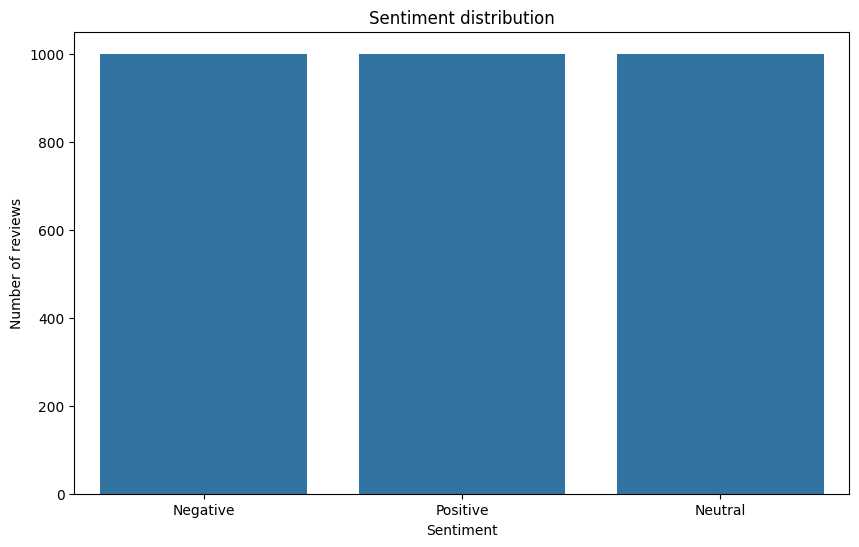

In [ ]:
#Визуализация данных
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sentiment')
plt.title('Sentiment distribution')
plt.xlabel('Sentiment')
plt.xticks(ticks=[0, 1, 2], labels=['Negative', 'Positive', 'Neutral'])
plt.ylabel('Number of reviews')
plt.show()

#Предобработка текста

Для предобработки текста из набора данных с использованием библиотек NLTK и Mystem, напишем функцию, которая выполняет следующие шаги:
- Токенизация текста.
- Приведение текста к нижнему регистру.
- Удаление пунктуации и цифр.
- Удаление стоп-слов.
- Лемматизация с использованием Mystem.

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from pymystem3 import Mystem

In [ ]:
# Загрузка стоп-слов для русского языка
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

# Инициализация Mystem
mystem = Mystem()

# Функция для предобработки текста
def preprocess_text(text):
    # Приведение к нижнему регистру
    text = text.lower()

    # Удаление пунктуации и цифр
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Токенизация текста
    tokens = word_tokenize(text, language='russian')

    # Удаление стоп-слов
    stop_words = set(stopwords.words('russian'))
    tokens = [word for word in tokens if word not in stop_words]

    # Лемматизация с использованием Mystem
    lemmas = mystem.lemmatize(' '.join(tokens))
    lemmas = [lemma.strip() for lemma in lemmas if lemma.strip()]

    return ' '.join(lemmas)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [ ]:
# Применение функции предобработки к колонке 'review'
df['processed_review'] = df['review'].apply(preprocess_text)

In [ ]:
print(df.head())

                                              review sentiment  \
0  Мечта каждой девушки встретить принца на белом...       pos   
1  Фильм не оставил ярких воспоминаний после прос...       neg   
2  Я честно пыталась полюбить этот фильм, но он о...       neg   
3  У фильма есть как хорошие, так и плохие момент...       neu   
4  Прекрасно понимаю, что сейчас на меня польются...       neg   

                                    processed_review  
0  мечта каждый девушка встречать принц белый кон...  
1  фильм оставлять яркий воспоминание просмотр эт...  
2  честно пытаться полюбить фильм оказываться пол...  
3  фильм хороший плохой момент очень понравиться ...  
4  прекрасно понимать поливаться обвинение бессер...  


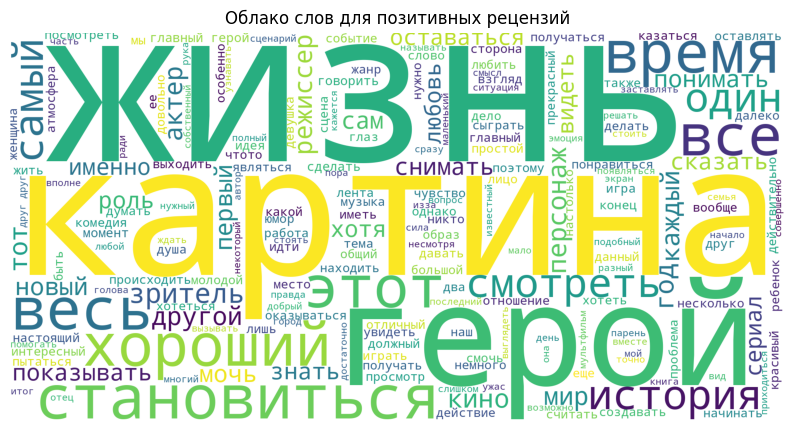

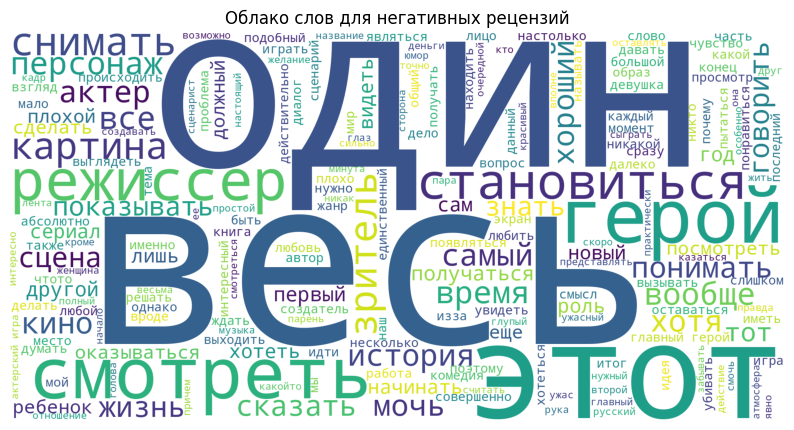

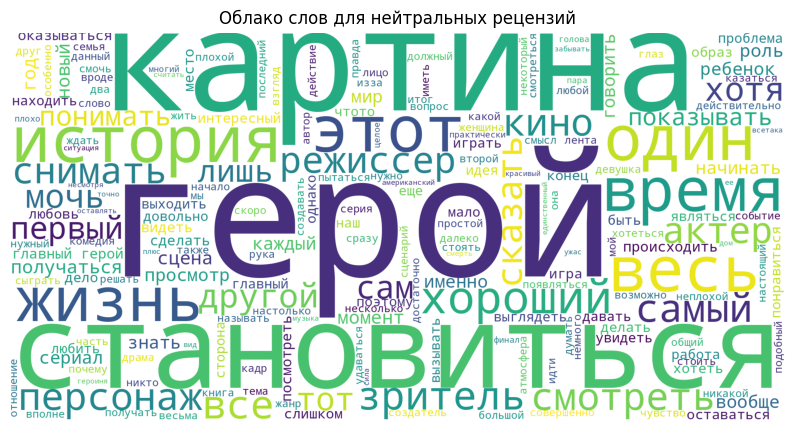

In [ ]:
#Облако слов

from wordcloud import WordCloud, STOPWORDS

stop_words = STOPWORDS
stop_words = stop_words.union({'такой', 'это', 'фильм', 'который', 'свой', 'человек','сюжет','просто','очень'})

positive_text = "".join(df[df['sentiment'] == 'pos']['processed_review'])

wordcloud = WordCloud(width=2000, height=1000, background_color='white', stopwords=stop_words).generate(positive_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.title('Облако слов для позитивных рецензий')
plt.axis('off')
plt.show()

negative_text = "".join(df[df['sentiment'] == 'neg']['processed_review'])

wordcloud = WordCloud(width=2000, height=1000, background_color='white', stopwords=stop_words).generate(negative_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.title('Облако слов для негативных рецензий')
plt.axis('off')
plt.show()

neutral_text = "".join(df[df['sentiment'] == 'neu']['processed_review'])

wordcloud = WordCloud(width=2000, height=1000, background_color='white', stopwords=stop_words).generate(neutral_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.title('Облако слов для нейтральных рецензий')
plt.axis('off')
plt.show()

In [ ]:
#Разбиваем на train и test:
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df["processed_review"], df["sentiment"], test_size=0.33, random_state=42)

# Мешок слов (Bag of Words, BoW)

In [ ]:

#Модель машинного обучения - логистическая регрессия
from sklearn.linear_model import LogisticRegression
#Векторизация текста
from sklearn.feature_extraction.text import CountVectorizer
from nltk import ngrams


Объект CountVectorizer делает простую вещь:
- строит для каждого документа (каждой пришедшей ему строки) вектор размерности  n, где n -- количество слов или n-грам во всём корпусе
- заполняет каждый i-тый элемент количеством вхождений слова в данный документ

In [ ]:
vec = CountVectorizer(ngram_range=(1, 1)) # строим BoW для слов
bow = vec.fit_transform(x_train)# преобразуем обучающие данные

ngram_range отвечает за то, какие n-граммы мы используем в качестве признаков:
- ngram_range=(1, 1) -- униграммы
- ngram_range=(3, 3) -- триграммы
- ngram_range=(1, 3) -- униграммы, биграммы и триграммы.

В vec.vocabulary_ лежит словарь: соответствие слов и их индексов в словаре:

In [ ]:
list(vec.vocabulary_.items())[:10]

[('мир', 15334),
 ('существовать', 29834),
 ('примерно', 23801),
 ('тысяча', 31212),
 ('язык', 35233),
 ('недавно', 16986),
 ('райан', 25508),
 ('гослинг', 6464),
 ('придумывать', 23681),
 ('единственный', 8528)]

In [ ]:
# строим модель машинного обучения
clf = LogisticRegression(random_state=42, max_iter=500)
# обучаем модель
clf.fit(bow, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [ ]:
#Посмотрим на качество классификации на тестовой выборке. Для этого выведем classification_report из модуля sklearn.metrics
#В качестве целевой метрики качества будем рассматривать macro average f1-score.

pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

         neg       0.61      0.62      0.62       333
         neu       0.50      0.43      0.46       367
         pos       0.55      0.63      0.59       290

    accuracy                           0.56       990
   macro avg       0.55      0.56      0.56       990
weighted avg       0.55      0.56      0.55       990



Качество получилось довольно низкое и это объясняется небольшим набором данных: мы сделали срез в 3000 от 18000.

In [ ]:
#Попробуем сделать то же самое для триграмм:
vec = CountVectorizer(ngram_range=(3, 3))
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42, max_iter = 300)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

         neg       0.04      0.87      0.07        15
         neu       0.97      0.33      0.49       934
         pos       0.09      0.71      0.16        41

    accuracy                           0.35       990
   macro avg       0.36      0.63      0.24       990
weighted avg       0.91      0.35      0.47       990



# TF-IDF векторизация

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vec = TfidfVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42, max_iter = 500)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

         neg       0.70      0.66      0.68       357
         neu       0.47      0.50      0.48       302
         pos       0.68      0.68      0.68       331

    accuracy                           0.62       990
   macro avg       0.62      0.61      0.61       990
weighted avg       0.62      0.62      0.62       990



In [ ]:
# использование
phrase="Это прекрасный фильм, который вызывает максимально положительные эмоции. Всем рекомендую!"
phrase=preprocess_text(phrase)
print(phrase)
pred = clf.predict(vec.transform([phrase]))
print(pred)


phrase="Это отврательный фильм, скучный и затянутый. Не рекомендую!"
phrase=preprocess_text(phrase)
print(phrase)
pred = clf.predict(vec.transform([phrase]))
print(pred)

это прекрасный фильм который вызывать максимально положительный эмоция все рекомендовать
['pos']
это отврательный фильм скучный затягивать рекомендовать
['neg']


# Задание

1. Примените классифкатор KNeighborsClassifier
1. RandomForestClassifier
1. Сравните качество полученных результатов с LogisticRegression и сделайте вывод

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

data_url = "https://raw.githubusercontent.com/yakushinav/mo2025/refs/heads/main/data/kinopoisk_reviews_small.csv"
df = pd.read_csv(data_url, index_col=0)

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from pymystem3 import Mystem

nltk.download('stopwords')
nltk.download('punkt')
mystem = Mystem()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    tokens = word_tokenize(text, language='russian')
    stop_words = set(stopwords.words('russian'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmas = mystem.lemmatize(' '.join(tokens))
    lemmas = [lemma.strip() for lemma in lemmas if lemma.strip()]
    return ' '.join(lemmas)

df['processed_review'] = df['review'].apply(preprocess_text)

x_train, x_test, y_train, y_test = train_test_split(df["processed_review"], df["sentiment"], test_size=0.33, random_state=42)
data_url = "https://raw.githubusercontent.com/yakushinav/mo2025/refs/heads/main/data/kinopoisk_reviews_small.csv"
df = pd.read_csv(data_url, index_col=0)
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from pymystem3 import Mystem
nltk.download('stopwords')
nltk.download('punkt')
mystem = Mystem()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    tokens = word_tokenize(text, language='russian')
    stop_words = set(stopwords.words('russian'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmas = mystem.lemmatize(' '.join(tokens))
    lemmas = [lemma.strip() for lemma in lemmas if lemma.strip()]
    return ' '.join(lemmas)

df['processed_review'] = df['review'].apply(preprocess_text)
x_train, x_test, y_train, y_test = train_test_split(df["processed_review"], df["sentiment"], test_size=0.33, random_state=42)

vec_bow = CountVectorizer(ngram_range=(1, 1))
bow_train = vec_bow.fit_transform(x_train)
bow_test = vec_bow.transform(x_test)

knn_bow = KNeighborsClassifier(n_neighbors=5)
rf_bow = RandomForestClassifier(random_state=42)
lr_bow = LogisticRegression(random_state=42, max_iter=500)

knn_bow.fit(bow_train, y_train)
rf_bow.fit(bow_train, y_train)
lr_bow.fit(bow_train, y_train)

knn_pred_bow = knn_bow.predict(bow_test)
rf_pred_bow = rf_bow.predict(bow_test)
lr_pred_bow = lr_bow.predict(bow_test)

print("Bag of Words:")
print("KNeighborsClassifier:\n", classification_report(y_test, knn_pred_bow))
print("RandomForestClassifier:\n", classification_report(y_test, rf_pred_bow))
print("LogisticRegression:\n", classification_report(y_test, lr_pred_bow))


vec_tfidf = TfidfVectorizer(ngram_range=(1, 1))
tfidf_train = vec_tfidf.fit_transform(x_train)
tfidf_test = vec_tfidf.transform(x_test)


knn_tfidf = KNeighborsClassifier(n_neighbors=5)
rf_tfidf = RandomForestClassifier(random_state=42)
lr_tfidf = LogisticRegression(random_state=42, max_iter=500)

knn_tfidf.fit(tfidf_train, y_train)
rf_tfidf.fit(tfidf_train, y_train)
lr_tfidf.fit(tfidf_train, y_train)


knn_pred_tfidf = knn_tfidf.predict(tfidf_test)
rf_pred_tfidf = rf_tfidf.predict(tfidf_test)
lr_pred_tfidf = lr_tfidf.predict(tfidf_test)

print("TF-IDF:")
print("KNeighborsClassifier:\n", classification_report(y_test, knn_pred_tfidf))
print("RandomForestClassifier:\n", classification_report(y_test, rf_pred_tfidf))
print("LogisticRegression:\n", classification_report(y_test, lr_pred_tfidf))

#print ("Сравнение результатов показывает, что TF-IDF с LogisticRegression или RandomForestClassifier часто обеспечивает лучшие результаты в задачах классификации текстов, особенно когда важна семантика и контекст. KNeighborsClassifier может быть менее точным, но его простота и скорость могут быть преимуществами в определенных сценариях.")"


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/russian/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************
